# Log Normal Random Walk Example

In [48]:
import numpy as np
from matplotlib import pyplot as plt
import math
import pandas as pd

In [49]:
#Variables
S = 100  #Beginning Stock Price
Sigma = 0.20  #Volatility
r = 0.05  #risk free rate
T = 1  #TimePeriod in Years
dt = 1/252  #timestep  1/252 is daily using trading days


Generate a single realization of the log normal random walk

In [50]:
#Generate Phi Values
x = np.random.standard_normal(int(T/dt))

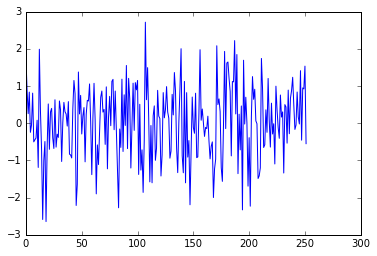

In [51]:
%matplotlib inline
#plot of Phi Values

plt.plot(x)
plt.show()

In [52]:
#Calculation of Phi average - should be approximately zero
mean = np.mean(x)
mean

0.02354631734479011

In [53]:
#Calculation of Phi standard deviation - should be approximately 1
stdev = np.std(x)
stdev

0.97919409631701471

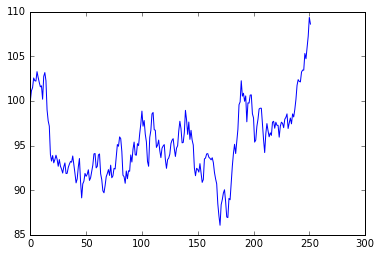

In [54]:
%matplotlib inline
#Generation of single realization of the log normal random walk
walk = np.zeros_like(x)

walk[0]=S

for step in range(1,252):
    walk[step] = walk[step-1] * math.exp( (r-(.5*Sigma**2))*dt + (Sigma*x[step]*math.sqrt(dt)) )

plt.plot(walk)
plt.show()

Generation of Multiple Paths - Monte Carlo Simulation

In [55]:
paths = 100  #set number of realizations to calculate

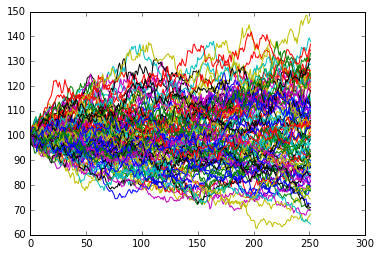

In [56]:
%matplotlib inline
total_steps = 252*T
simulation = np.zeros((paths, total_steps))  #Setup empty numpy array to hold data
FV = np.zeros(paths)  #Setup empty numpy array to hold ending values of simulations

for sim in range(0,paths):
    simulation[sim,0] = S  #set V0 to S
    phi = np.random.standard_normal(int(T*252))  #Generate unique random numbers for each simulation
    for step in range(1,int(252*T)):
        simulation[sim,step] = simulation[sim,step-1] * math.exp( (r-(.5*Sigma**2))*dt + (Sigma*phi[step]*math.sqrt(dt)) )
        FV[sim] = simulation[sim,total_steps-1]

plt.plot(np.transpose(simulation))
plt.show()

In [57]:
#Average of simulation ending values
sim_avg = np.mean(FV)
sim_avg

101.4945981119281

In [58]:
#Standard Deviation of ending values
sim_std = np.std(FV)
sim_std

18.072328429916645

In [59]:
sim_min, sim_max = np.min(FV), np.max(FV)
sim_min, sim_max

(64.349886162257533, 147.39242323468088)

In [60]:
#Sigma deviation - Minimum
(S - sim_min) / sim_std

1.9726353455777084

In [61]:
#Sigma deviation - Maximum
(sim_max - S) / sim_std

2.6223750535779446